In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Target
From the info of train and test: <br>
    Age is missing -> Both train and test<br>
    Fare is missing -> Test (only missing one)<br>
    Cabin is missing -> Both train and test<br>
    Embarked is missing -> Train<br>

In [2]:
train = pd.read_csv('train.csv',index_col='PassengerId')
test = pd.read_csv('test.csv',index_col='PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [5]:
dataset = [train,test]

### Name
Title in the name can be used to infer the missing ages.<br>
Therefore, title will be extract and put into groups.<br>
Titles can be categorize into 5 groups:
    Mr -> 1
    Miss -> 2
    Mrs -> 3
    Master -> 4
    Other -> 5 <br>
From the Title, it can be tell that Mr. dies more than other titles.   

In [6]:
for data in dataset:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss


In [7]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Lady          1
Mme           1
Capt          1
Don           1
Ms            1
Sir           1
Countess      1
Name: Title, dtype: int64

In [8]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [9]:
title_dic = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Dr':5,
            'Rev':5,'Major':5,'Mlle':5,'Col':5,'Lady':5,
            'Capt':5,'Ms':5,'Sir':5,'Countess':5,'Mme':5,
            'Don':5,'Jonkheer':5,'Dona':5}
for data in dataset:
    data['Title'].replace(title_dic,inplace=True)

In [10]:
def show(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survive','Dead']
    df.plot.bar(stacked=True)

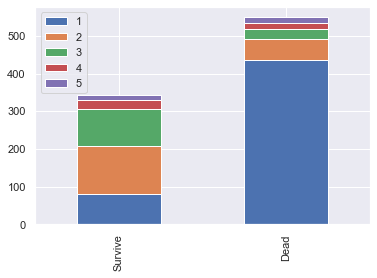

In [11]:
show('Title')

### Sex
Male dies more<br>
male = 0, female=1

In [12]:
for data in dataset:
    data['Sex'].replace({'male':0,'female':1},inplace=True)

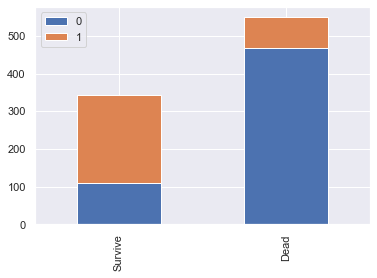

In [13]:
show('Sex')

### Age
Use the median age of the title to fill in the missing ages.<br>
(Not using mean because mean will be skew toward extreme value when the distribution is not symmetric)<br>
It can be tell that people that died were mostly around 30 years old<br>
binning with bin = 10

<AxesSubplot:xlabel='Age', ylabel='Count'>

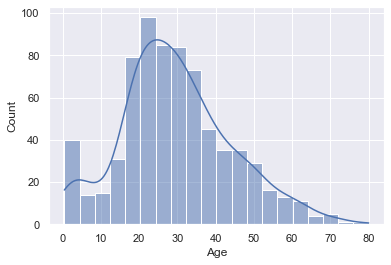

In [14]:
sns.histplot(data=train, x="Age", kde=True)

In [15]:
train.groupby('Title').Age.median()

Title
1    30.0
2    21.0
3    35.0
4     3.5
5    44.5
Name: Age, dtype: float64

In [16]:
for data in dataset:
    data['Age'].fillna(data.groupby('Title').Age.transform('median'),inplace=True)

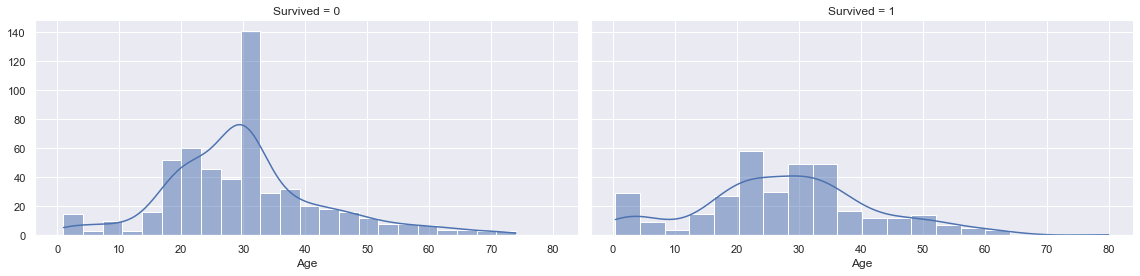

In [17]:
age_facet = sns.FacetGrid(train,col='Survived',height=4,aspect=2)
age_facet.map(sns.histplot,'Age',kde=True)

In [18]:
for data in dataset:
    for index,age in data['Age'].items():
        if age <= 10:
            data['Age'][index] = 0
        elif (age > 10) & (age <= 20):
            data['Age'][index] = 1
        elif (age > 20) & (age <= 30):
            data['Age'][index] = 2
        elif (age > 30) & (age <= 40):
            data['Age'][index] = 3
        elif (age > 40) & (age <= 50):
            data['Age'][index] = 4
        elif (age > 50) & (age <= 60):
            data['Age'][index] = 5
        elif (age > 60) & (age <= 70):
            data['Age'][index] = 6
        elif (age > 70) & (age <= 80):
            data['Age'][index] = 7
        elif (age > 80) & (age <= 90):
            data['Age'][index] = 8

<ipython-input-18-6fa7a5148def>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][index] = 2
<ipython-input-18-6fa7a5148def>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][index] = 3
<ipython-input-18-6fa7a5148def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][index] = 5
<ipython-input-18-6fa7a5148def>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

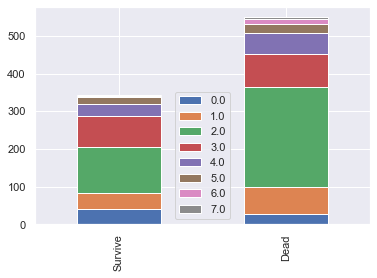

In [19]:
show('Age')

### Embarked
Board from S is more likely to die<br>
Use Pclass to predict missing Embarked -> Found that most Pclass board from S<br>
Embarked: 0 = C, 1 = Q, 2 = S

In [20]:
train.groupby('Pclass').Embarked.value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [21]:
for data in dataset:
    data['Embarked'].fillna('S',inplace=True)

In [22]:
for data in dataset:
    for index,emb in data['Embarked'].items():
        if emb == 'C':
            data['Embarked'][index] = 0
        elif emb == 'Q':
            data["Embarked"][index] = 1
        elif emb == 'S':
            data['Embarked'][index] = 2

<ipython-input-22-6e7cb94c67b9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'][index] = 2
<ipython-input-22-6e7cb94c67b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'][index] = 0
<ipython-input-22-6e7cb94c67b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"][index] = 1


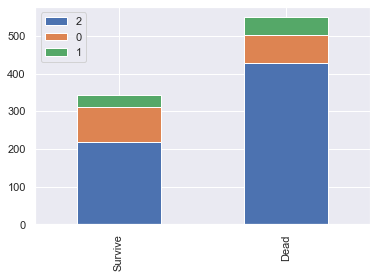

In [23]:
show('Embarked')

### Fare
Board with fare 0-10 is more likely to die<br>
By graph -> bin Fare into 5 groups<br>
    0 -> 0-10<br>
    1-> 11-20<br>
    2 -> 21-30<br>
    3 -> 31-40<br>
    4 -> 41+

In [24]:
test[pd.isnull(test['Fare'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",0,6.0,0,0,3701,NaN,NaN,2,1


In [25]:
test.groupby('Pclass').Fare.mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [26]:
test.Fare.fillna(12.46,inplace=True)

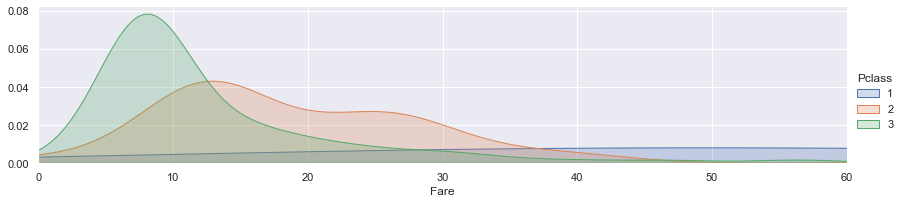

In [27]:
fare_facet = sns.FacetGrid(train,hue='Pclass',xlim=[0,60],aspect=4)
fare_facet.map(sns.kdeplot,'Fare',shade=True)
fare_facet.add_legend()

In [28]:
for data in dataset:
    for index,far in data['Fare'].items():
        if far <= 10:
            data['Fare'][index] = 0
        elif (far > 10) & (far <= 20):
            data['Fare'][index] = 1
        elif (far > 20) & (far <= 30):
            data['Fare'][index] = 2
        elif (far > 30) & (far <= 40):
            data['Fare'][index] = 3
        elif far > 40:
            data['Fare'][index] = 4

<ipython-input-28-3efcbb3cbc2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'][index] = 0
<ipython-input-28-3efcbb3cbc2f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'][index] = 4
<ipython-input-28-3efcbb3cbc2f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'][index] = 2
<ipython-input-28-3efcbb3cbc2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

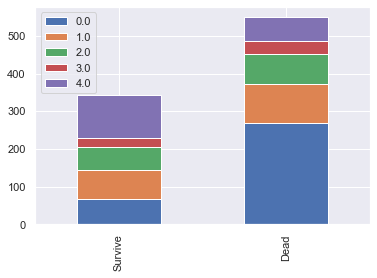

In [29]:
show('Fare')

### Cabin
Cabin F is more likely to die<br>
Fill in with mode<br>
Pclass1 -> C, Pclass 2&3 -> F<br>
A=0,B=1,C=2,D=3,E=4,F=5,G=6,T=7

In [30]:
train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
D              3
              ..
B4             1
B19            1
E36            1
C70            1
C46            1
Name: Cabin, Length: 147, dtype: int64

In [31]:
for data in dataset:
    data['Cabin'] = data['Cabin'].str[:1]

In [32]:
train.groupby('Pclass').Cabin.value_counts()

Pclass  Cabin
1       C        59
        B        47
        D        29
        E        25
        A        15
        T         1
2       F         8
        D         4
        E         4
3       F         5
        G         4
        E         3
Name: Cabin, dtype: int64

In [33]:
cabin_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}
for data in dataset:
    data['Cabin'].replace(cabin_dict,inplace=True)

In [34]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,NaN,2,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,4.0,2.0,0,3
3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,NaN,2,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,4.0,2.0,2,3
5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,0.0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,1.0,NaN,2,5
888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,2.0,1.0,2,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,2.0,NaN,2,2


In [35]:
for data in dataset:
    class1 = data[data['Pclass']==1].Cabin
    classother = data[data['Pclass']!=1].Cabin
    class1.fillna(2,inplace=True)
    classother.fillna(5,inplace=True)
    data['Cabin'].fillna(class1,inplace=True)
    data['Cabin'].fillna(classother,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


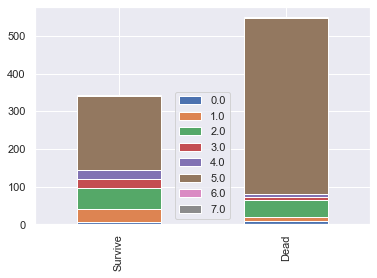

In [36]:
show('Cabin')

### Family Size
From the graph -> Board alone is more likely to die

In [37]:
for data in dataset:
    data['Fam'] = data['SibSp'] + data['Parch']+1 # Add 1 to indicate oneself

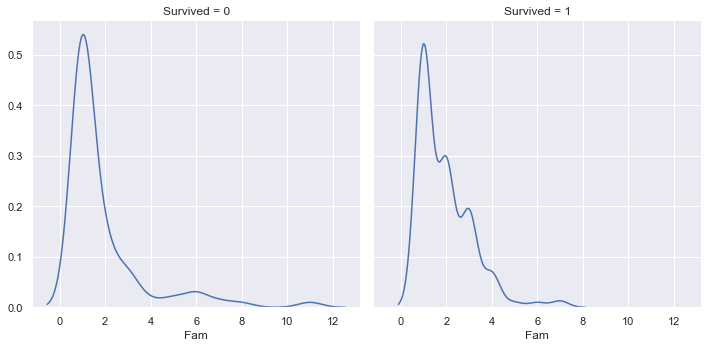

In [38]:
fam_facet = sns.FacetGrid(train,col='Survived',height=5,aspect=1)
fam_facet.map(sns.kdeplot,'Fam')

### Drop None used feature

In [39]:
train_features_drop = ['Survived','Name','SibSp','Parch','Ticket']
train.drop(train_features_drop,axis=1,inplace=True)
test_features_drop = ['Name','SibSp','Parch','Ticket']
test.drop(test_features_drop,axis=1,inplace=True)

In [40]:
train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Fam
PassengerId,,,,,,,,
1,3,0,2.0,0.0,5.0,2,1,2
2,1,1,3.0,4.0,2.0,0,3,2
3,3,1,2.0,0.0,5.0,2,2,1
4,1,1,3.0,4.0,2.0,2,3,2
5,3,0,3.0,0.0,5.0,2,1,1


In [41]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Fam
PassengerId,,,,,,,,
892,3,0,3.0,0.0,5.0,1,1,1
893,3,1,4.0,0.0,5.0,2,3,2
894,2,0,6.0,0.0,5.0,1,1,1
895,3,0,2.0,0.0,5.0,2,1,1
896,3,1,2.0,1.0,5.0,2,3,3


In [42]:
train.to_csv('train_features.csv')
test.to_csv('test_features.csv')

In [43]:
survive = pd.read_csv('train.csv',index_col='PassengerId')
survive['Survived'].to_csv('Survive_Label.csv')